### Prachee Prasad, 281060

## Assignment 6

Data consists of temperatures of INDIA averaging the temperatures of all places month
wise. Temperatures values are recorded in CELSIUS.

a) Apply Linear Regression using suitable library function and predict the Month-wise
temperature.

b) Assess the performance of regression models using MSE, MAE and R-Square metrics

c) Visualize simple regression model.

In [ ]:
# Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Load dataset

# Load dataset
dataset_path = "/content/drive/MyDrive/ML_Assignments/datasets/temperatures.csv"
df = pd.read_csv(dataset_path)

# Display first few rows
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [ ]:
# Check for missing values

df.isnull().sum()

,0
YEAR,0
JAN,0
FEB,0
MAR,0
APR,0
MAY,0
JUN,0
JUL,0
AUG,0
SEP,0


In [ ]:
# Transform Data

# Drop unnecessary columns (keeping only monthly temperatures)
df_melted = df.melt(id_vars=['YEAR'], value_vars=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                                                    'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
                     var_name='Month', value_name='Temperature')

# Convert month names to numerical values
month_mapping = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
                 'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}
df_melted['Month'] = df_melted['Month'].map(month_mapping)

# Display transformed dataset
df_melted.head()

,YEAR,Month,Temperature
0,1901,1,22.40
1,1902,1,24.93
2,1903,1,23.44
3,1904,1,22.50
4,1905,1,22.00


In [ ]:
# Split Data

# Features and target
X = df_melted[['Month']].values  # Feature (Month as a number)
y = df_melted['Temperature'].values  # Target (Temperature)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Model

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate Model

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-Square Score: {r2:.2f}")

Mean Squared Error (MSE): 10.00
Mean Absolute Error (MAE): 2.71
R-Square Score: -0.01


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


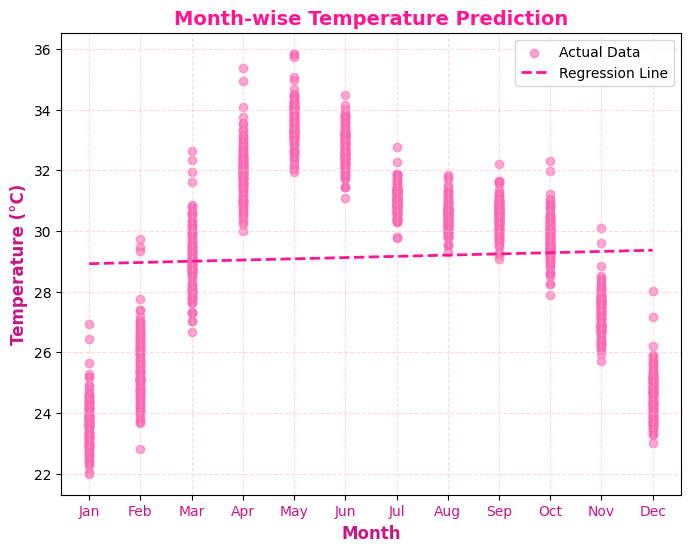

In [ ]:
# Visualise

# Sort data for smooth plotting
df_sorted = df_melted.groupby('Month').mean().reset_index()

# Pink-themed visualization
plt.figure(figsize=(8, 6))
plt.scatter(df_melted['Month'], df_melted['Temperature'], color='#FF69B4', alpha=0.6, label='Actual Data')  # Hot Pink
plt.plot(df_sorted['Month'], model.predict(df_sorted[['Month']]), color='#FF1493', linestyle='--', linewidth=2, label='Regression Line')  # Deep Pink
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], color='#C71585')  # Medium Violet Red
plt.xlabel('Month', color='#C71585', fontsize=12, fontweight='bold')
plt.ylabel('Temperature (°C)', color='#C71585', fontsize=12, fontweight='bold')
plt.title('Month-wise Temperature Prediction', color='#FF1493', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(color='pink', linestyle='dashed', alpha=0.6)
plt.show()